In [ ]:
!pip3 install torch
!pip3 install torchvision
!pip3 install matplotlib
!pip3 install torchmetrics

import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn

print("Success")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 419 kB 7.2 MB/s 


In [ ]:
from torch.utils.data import Dataset, DataLoader

torchvision은 파이토이에서 제공하는 데이터 셋이 모여있는 패키지 
- transforms : 전처리할떄 사용하는 메소드
- transform 에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 진행

In [ ]:
import torchvision.transforms as transforms
from torchvision import datasets

- DataLoader의 인자로 들어갈 transform을 미리 정의 할 수 있고, Compose를 통해 리스트 안에 순서대로 전처리 진행
- ToTensor()를 하는 이유는 torchvision이 PIL Image 형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor형으로 변환

In [ ]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(mean = (0.5,), std=(1.0,))])

trainset = datasets.MNIST(root="/content/",
                          train=True,
                          download=True,
                          transform=mnist_transform)
testset = datasets.MNIST(root="/content/",
                          train=False,
                          download=True,
                          transform=mnist_transform)

Success


DataLoader는 데이터 전체를 보관했다가 실제 모델을 학습 할떄 batch_size 크기만큼 데이터를 가져옴

In [ ]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(trainset, batch_size=8, shuffle=False, num_workers=2)

In [ ]:
dataiter = iter(train_loader)
images, label = dataiter.next()

print(images.shape)
print(label)

torch.Size([8, 1, 28, 28])
tensor([1, 0, 8, 9, 7, 5, 7, 9])


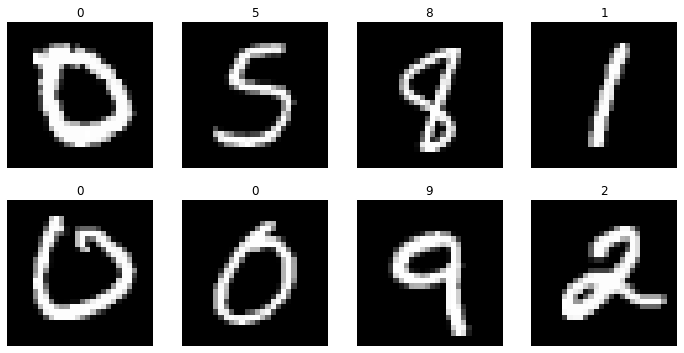

In [ ]:
torch_image = torch.squeeze(images[0])

figure = plt.figure(figsize = (12, 6))
cols, rows = 4,2
for i in range(1, cols*rows + 1):
  sample_idx = torch.randint(len(trainset), size = (1,)).item()
  img, label = trainset[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# 신경망 구성
- 레이어 : 하나 이상의 텐서를 입력받아 하나 이상의 텐서 출력
- 모듈 : 한개 이상의 계층이 모여서 구성
- 모델 : 한개 이상의 모듈이 모여서 구성

# torch.nn 패키지
- 주로 weight, bias 값들이 내부에서 자동으로 생성되는 레이어를 사용할떄 사용

In [ ]:
input = torch.randn(128,20)
print(input)

m = nn.Linear(20, 30) # 입력 되는 feature은 20 출력되는 feature는 30
print(m)

output = m(input)
print(output)
print(output.size())

tensor([[ 0.1677, -0.2547, -0.1403,  ...,  1.6367, -0.1085, -0.5782],
        [-0.0440,  0.1508, -1.0560,  ...,  1.4961, -0.1856, -0.0129],
        [ 1.1387, -0.0457, -0.6400,  ..., -0.0148, -1.7395,  2.2417],
        ...,
        [-0.2750, -0.2592,  0.0271,  ..., -0.3585, -1.0673, -1.9620],
        [ 1.3788,  1.7774,  0.0450,  ...,  0.3500,  1.4519, -1.9945],
        [ 0.8017,  1.3968, -1.1732,  ...,  0.7428,  0.4334,  0.0111]])
Linear(in_features=20, out_features=30, bias=True)
tensor([[-0.1775,  0.4452, -0.3048,  ...,  0.1330, -0.1943,  0.0323],
        [-0.5735,  0.6214,  0.8635,  ...,  1.0779, -0.0742,  0.2831],
        [-1.2060,  1.1362,  0.9572,  ..., -0.0655, -1.0926,  0.4861],
        ...,
        [-0.1444, -0.4802, -0.0634,  ..., -0.7306, -0.1541, -0.4725],
        [ 1.3120, -1.4632, -0.1764,  ..., -0.5018,  1.0630, -0.0517],
        [-0.1643, -0.6786,  0.8077,  ..., -0.2815, -0.2689,  0.0359]],
       grad_fn=<AddmmBackward0>)
torch.Size([128, 30])


nn.Conv2d 계층

In [ ]:
input = torch.randn(20, 16, 50, 100)
print(input.size())

m = nn.Conv2d(16, 33, 3, stride=2)
m = nn.Conv2d(16, 33, (3, 5), stride=(2,1), padding = (4,2), dilation = (3,1))

output = m(input)
print(output.shape)

torch.Size([20, 16, 50, 100])
torch.Size([20, 33, 26, 100])


In [ ]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [ ]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [ ]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

weight는 detach()를 통해 꺼내줘야 numpy()변환이 가능

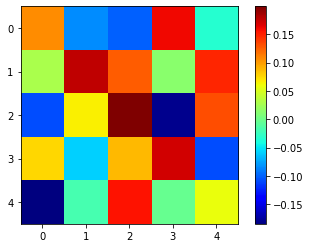

In [ ]:
weight = weight.detach()
weightnp = weight.numpy()

plt.imshow(weightnp[0, 0, :, :], "jet")
plt.colorbar()
plt.show()

In [ ]:
print(images.shape)
print(images[0].shape)

input_image = torch.squeeze(images[0])
print(input_image.shape)

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


In [ ]:
input_data = torch.unsqueeze(images[0], dim = 0)
print(input_data.shape)

output_data = layer(input_data)
output = output_data.data
output_arr = output.numpy()

print(output_arr.shape)

torch.Size([1, 1, 28, 28])
(1, 20, 24, 24)


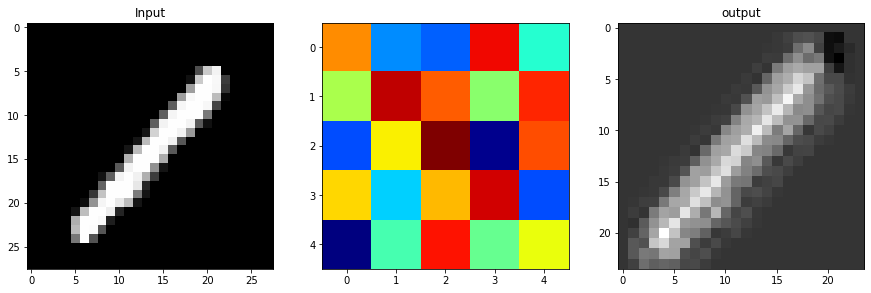

In [ ]:
plt.figure(figsize=(15, 30))
plt.subplot(131)
plt.title("Input")
plt.imshow(input_image, 'gray')

plt.subplot(132)
plt.imshow(weightnp[0, 0, :, :], "jet")

plt.subplot(133)
plt.title("output")
plt.imshow(output_arr[0, 0, :, :], 'gray')

plt.show()

풀링 레이어
- F.max_pool2d
  - stride
  - kernel_size
- torch.nn.MaxPool2d 도 많이 사용함

In [ ]:
import torch.nn.functional as F

pool = F.max_pool2d(output, 2, 2)
pool.shape
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

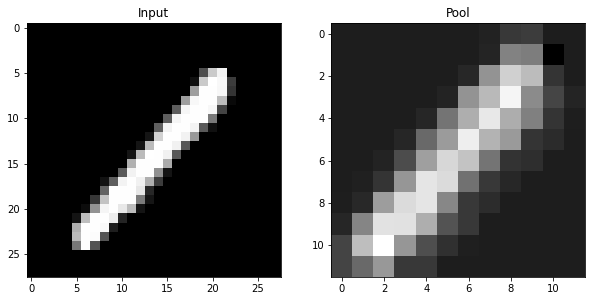

In [ ]:
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.title("Input")
plt.imshow(input_image, 'gray')

plt.subplot(122)
plt.title("Pool")
plt.imshow(pool_arr[0, 0, :, :], 'gray')
plt.show()

선형 레이어 
- 1d만 가능하므로 .view()를 통해 1dfh 펼쳐줘야 함

In [ ]:
flatten = input_image.view(1, 28 * 28)
flatten.shape

torch.Size([1, 784])

In [ ]:
lin = nn.Linear(784, 10) # input 채널은 784, output 채널은 10
output = lin(flatten)
print(output)

tensor([[-0.2682,  0.2117,  0.1347, -0.0077, -0.5633, -0.0752,  0.2030,  0.2696,
          0.2323, -0.4190]], grad_fn=<AddmmBackward0>)


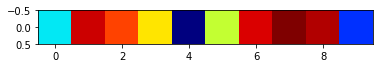

In [ ]:
plt.imshow(output.detach().numpy(), "jet")
plt.show()

Non-linear Activations
- F.softmax, F.relu와 같은 활성화 함수


In [ ]:
with torch.no_grad():
  flatten = input_image.view(1, 28 * 28)
  lin = nn.Linear(784, 10)(flatten)
  softmax = F.softmax(lin, dim = 1)

print(softmax)
print(np.sum(softmax.numpy()))

tensor([[0.0749, 0.0974, 0.1139, 0.1063, 0.0855, 0.0890, 0.1692, 0.0917, 0.0759,
         0.0963]])
0.99999994


In [ ]:
inputs = torch.randn(4, 3, 28, 28).to("cuda")
inputs.shape

torch.Size([4, 3, 28, 28])

In [ ]:
layer = nn.Conv2d(3, 20, 5, 1).to("cuda")
output1 = layer(inputs)
output2 = F.relu(output1)
print(output1.shape)
print(output2.shape)

torch.Size([4, 20, 24, 24])
torch.Size([4, 20, 24, 24])


# 모델 정의

# nn.Module 상송 클래스 정의
- nn.Module을 상속받은 클래스 정의
- __init__() : 모델에서 사용될 모듈과 활성화 함수등을 정의
- forward() : 모델에서 실행되어야하는 연산을 정의

In [ ]:
class Model(nn.Module):
  def __init__(self, inputs):
    # 모델에서 사용할 layer 정의
    super(Model, self).__init__()
    self.layer = nn.Linear(inputs, 1) # 처음 들어오는 layer는 inputs으로 정의
    self.activation = nn.Sigmoid()
  
  def forward(self, x):
    # 실제 연산 순서
    x = self.layer(x)
    x = self.activation(x)

    return x

In [ ]:
model = Model(1)
print(list(model.children()))
print(list(model.modules()))

[Linear(in_features=1, out_features=1, bias=True), Sigmoid()]
[Model(
  (layer): Linear(in_features=1, out_features=1, bias=True)
  (activation): Sigmoid()
), Linear(in_features=1, out_features=1, bias=True), Sigmoid()]


nn.Sequential을 이용한 신경망 정의 
- nn.Sequential 객체로 그안에 각 모듈을 순차적으로 실행
- __init__()에서 사용할 네트워크 모델을 nn.Sequential로 정의 가능
- forward()에서 실행되어야 할 계산을 가독성 높게 작성 가능

In [ ]:
class Model(nn.Module):
  def __init__(self, inputs):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels =3, out_channels=64, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2)
    )

    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels =64, out_channels=30, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2)
    )

    self.layer3 = nn.Sequential(
        nn.Linear(in_features = 30 * 5 * 5, out_features=10, bias=True),
        nn.ReLU(inplace=True),
    )

    def forward(self, x):
      x = self.layer1(x)
      x = self.layer2(x)
      x = self.layer3(x.view(x.shape[0], -1))
      return x


In [ ]:
model = Model(1)
print(list(model.children()))
print(list(model.modules()))

[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]
[Model(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=750, out_features=10, bias=True)
    (1): ReLU(inplace=True)
  )
), Sequential(
  (

# 모델 파라미터 


손실 함수
- torch.nn.BCELoss : 이진 분류를 위해 사용
- torch.nnCrossEntropyLoss : 다중 클래스 분류를 위해 사용
- torch.nn.MSELoss : 회귀 모델에서 사용


In [ ]:
criterion = nn.MSELoss()
criterion = nn.CrossEntropyLoss()

옵티마이저
- 손실함수를 기반으로 모델이 어떻게 업데이트되어야 하는지 결정
- optimizer는 step()을 통해 전달받은 파라미터를 업데이터
- zero_grad() 를 이용해 옵티마이저에 사용된 파라미터들의 기울기를 0으로 설정
- torch.optim.lr_scheduler를 이용해 epochs에 따라 학습률 조정


스케줄러
- 학습시 특정 조건에 따라 학습률을 조정하여 최적화 진행
- 일정 횟수 이상이 되면 학습률을 감소 시키거나 전역 최소점 근처에 가면 학습률을 줄임
- optim.lr_scheduler.LambdaLR : Lmabda 함수를 이용해 그 결과를 학습률로 설정
- optim.lr_scheduler.StepLR : Step 마다 학습률을 감마 비율만큼 감소
- optim.lr_scheduler.MultiStepLR : StepLR과 비슷하지만 특정 단계가 아니라 지정된 에포크에만 감마 비율로 감소
- optim.lr_scheduler.ExpoentialLR : 에포크마다 이전 학습률에 감마만큼 곱함
- optim.lr_schedule.CosineAnnealingLR : 학습률을 코사인 함수의 형태처럼 변화시켜 학습률이 커지기도하고 작어지기도 함
- optim.lr_scheduler.ReduceLROnPlateau : 학습이 잘되는지에 따라 동적으로 학습률 변화

지표(Metrics)
- 모델의 학습과 테스트 단계를 모니터링

In [ ]:
import torchmetrics

preds = torch.randn(10, 5).softmax(dim = -1)
target = torch.randint(5, (10, ))
print(preds, target)

acc = torchmetrics.functional.accuracy(preds, target)
print(acc)

tensor([[0.0992, 0.0782, 0.1402, 0.2698, 0.4126],
        [0.2148, 0.2061, 0.1116, 0.1360, 0.3314],
        [0.4419, 0.1487, 0.2511, 0.0341, 0.1242],
        [0.0160, 0.3139, 0.2803, 0.1171, 0.2728],
        [0.2764, 0.0197, 0.1785, 0.4197, 0.1057],
        [0.5072, 0.1588, 0.0805, 0.0389, 0.2145],
        [0.1515, 0.2594, 0.1081, 0.1326, 0.3485],
        [0.1548, 0.0433, 0.0170, 0.1573, 0.6277],
        [0.0738, 0.1963, 0.2648, 0.0824, 0.3827],
        [0.3317, 0.2932, 0.0639, 0.2789, 0.0323]]) tensor([4, 2, 3, 2, 3, 2, 4, 4, 3, 0])
tensor(0.5000)
